# Notebook for Convex Hull

First we import the required libraries

In [2]:
# import PIL
from PIL import Image
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
import numpy
#import tifffile
import os

import skimage

from skimage import data
from skimage.io import imsave

from skimage.filters import threshold_otsu
from skimage import morphology

Next, we Initialize our array and we load our images into it

In [3]:
raw_ct_scan_array = []

for fname in os.listdir('img/'):

        im = Image.open(os.path.join('img/',fname))
        imarray = numpy.array(im)
        raw_ct_scan_array.append(imarray)

raw_ct_scan_array = numpy.asarray(raw_ct_scan_array, dtype='uint8')

We can check our array using the shape attribute

In case color's don't work
(Source: https://stackoverflow.com/questions/38709618/rgb-values-being-returned-by-pil-dont-match-rgb-color,

for reference: https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/)

In [4]:
raw_ct_scan_array.shape

(344, 1024, 1024)

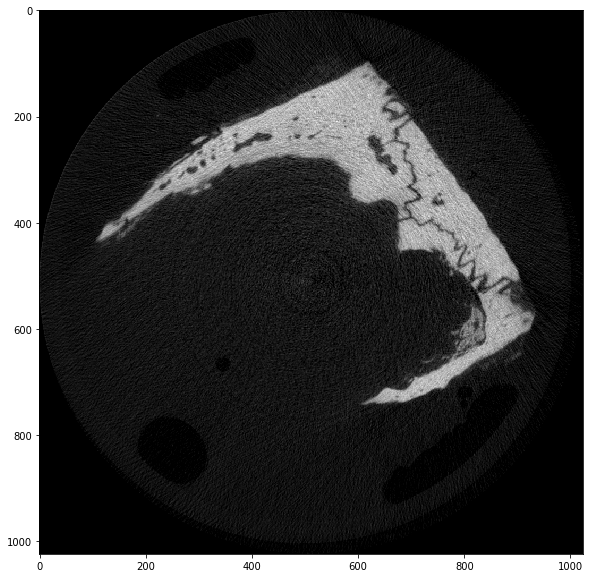

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(raw_ct_scan_array[150],cmap="gray")

Now, we will do hole closing on the images

Do some morphological operations to close tiny holes in images

In [6]:
closed_array = skimage.morphology.closing(raw_ct_scan_array)

In [7]:
closed_array.shape

(344, 1024, 1024)

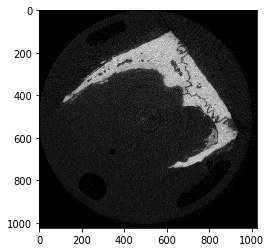

In [8]:
plt.imshow(closed_array[150],cmap ='gray')

In [9]:
flattened_array = closed_array.ravel()

In [10]:
otsu_threshold_value = threshold_otsu(flattened_array)

In [11]:
print(otsu_threshold_value)

72


In [12]:
filtered_array= raw_ct_scan_array > otsu_threshold_value

In [13]:
filtered_array.shape

(344, 1024, 1024)

Now we apply the Convex Hull

In [14]:
convex_hulled_array = []
for img in filtered_array:
    convex_hulled_array.append(skimage.morphology.convex_hull_image(img))
    


C:\Users\syeda\AppData\Local\Programs\Python\Python36\lib\site-packages\skimage\morphology\convex_hull.py:53: UserWarning: Input image is entirely zero, no valid convex hull. Returning empty image
  "Returning empty image", UserWarning)


In [15]:
convex_hulled_array = numpy.asarray(convex_hulled_array,dtype='uint8')

In [16]:
convex_hulled_array.shape

(344, 1024, 1024)

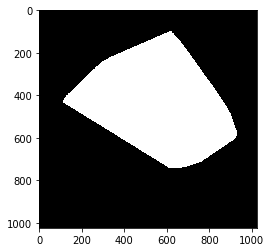

In [17]:
plt.imshow(convex_hulled_array[150], cmap='gray')

Finally, let's calculate the difference between the two and plot it.

In [18]:
filtered_array_float = filtered_array.astype(int)

So we basically made a floating point array from our images, this is an array where true = 1.0 and false = 0.0

In [86]:
print(filtered_array_float.max())

1


In [87]:
print(filtered_array_float.shape[0])

344


In [41]:
difference_array = []
for i in range (0, 344):
   difference_slice = convex_hulled_array[i] - filtered_array_float[i]
   difference_array.append(difference_slice)

In [42]:
difference_array = numpy.asarray(difference_array, dtype='uint8')

In [43]:
difference_array.shape

(344, 1024, 1024)

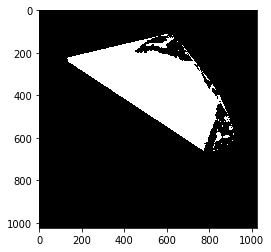

In [47]:
plt.imshow(difference_array[100], cmap='gray')

Now we export the slices

In [50]:
for i in range (0,344):
        im = Image.fromarray(numpy.uint8(difference_array[i,:,:]*255))

        im.save("Convex_Hull_Noisy/Chull_noisy_slice(%d) .png" % (i+1))